### 1. Carregando Bibliotecas

In [ ]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


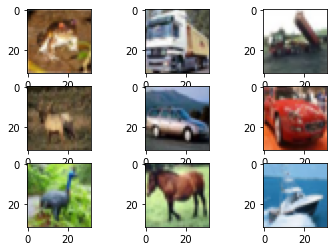

In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [ ]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
num_classes

10

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [ ]:
(x_train, x_valid) = x_train[4500:], x_train[:4500]
(y_train, y_valid) = y_train[4500:], y_train[:4500] 

#x_valid = x_test[:4500]
#y_valid = y_test[:4500] 

#(xxx_train, xxx_valid) = x_train[10000:], x_train[:10000]
#(yyy_train, yyy_valid) = y_train[10000:], y_train[:10000] 

#xfin_train = np.concatenate((xx_train, xxx_train)) 
#xfin_valid = np.concatenate((xx_valid, xxx_valid)) 
#yfin_train = np.concatenate((yy_train, yyy_train)) 
#yfin_valid = np.concatenate((yy_valid, yyy_valid)) 

#x_train, x_valid = train_test_split(x_train, test_size = .30)
#y_train, y_valid = train_test_split(y_train, test_size = .30)

Impressão da forma do conjunto de treino

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (45500, 32, 32, 3)


In [ ]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (4500, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45500 train samples
10000 test samples
4500 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

*   2 camadas convolucionais de tamanho progressivamente crescente
*   Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
*   Uma camada do tipo totalmente conectada de 120 neurônios
*   Uma camada do tipo totalmente conectada de 84 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=4,  activation='relu', input_shape=(32, 32, 3)))                        
model.add(AveragePooling2D(pool_size=4))
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=2,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(576, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(288, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

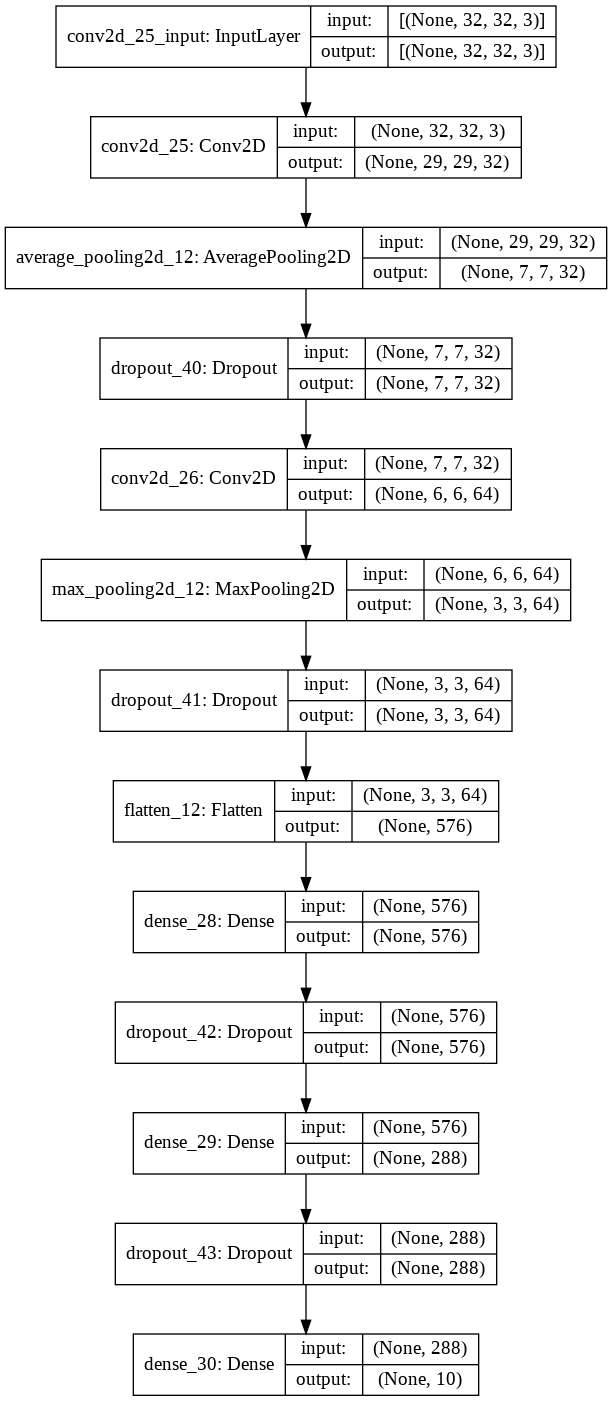

In [ ]:
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                  

### 7. Treinando o modelo

In [ ]:
from keras.callbacks import ModelCheckpoint   

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/checkpoints/modelocifar_FIAP.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              
hist = model.fit(x_train, y_train, batch_size=110, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/100
414/414 [==============================] - 35s 81ms/step - loss: 2.1694 - accuracy: 0.1856 - val_loss: 1.6948 - val_accuracy: 0.3824

Epoch 00001: val_accuracy improved from -inf to 0.38244, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP.hdf5
Epoch 2/100
414/414 [==============================] - 33s 80ms/step - loss: 1.6973 - accuracy: 0.3736 - val_loss: 1.5133 - val_accuracy: 0.4491

Epoch 00002: val_accuracy improved from 0.38244 to 0.44911, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP.hdf5
Epoch 3/100
414/414 [==============================] - 33s 80ms/step - loss: 1.5837 - accuracy: 0.4169 - val_loss: 1.4445 - val_accuracy: 0.4807

Epoch 00003: val_accuracy improved from 0.44911 to 0.48067, saving model to /content/drive/My Drive/checkpoints/modelocifar_FIAP.hdf5
Epoch 4/100
414/414 [==============================] - 33s 80ms/step - loss: 1.5202 - accuracy: 0.4446 - val_loss: 1.3940 - val_accuracy: 0.4940

Epoch 00004: val_

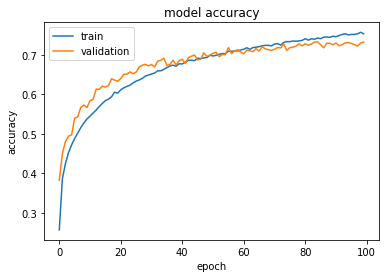

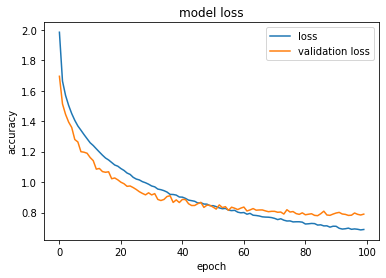

In [ ]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'])
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [ ]:
model = load_model("/content/drive/My Drive/checkpoints/modelocifar_FIAP.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6110000014305115


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
y_hat[100,:]

array([1.8361376e-03, 7.8210367e-05, 1.0186662e-01, 3.3845916e-01,
       7.0128873e-02, 3.9496195e-01, 6.8083175e-02, 2.0421829e-02,
       3.5555966e-03, 6.0842745e-04], dtype=float32)

In [ ]:
y_hat_classes = model.predict_classes(x_test)
y_hat_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6, 8, 8, ..., 5, 1, 7])

In [ ]:
y_hat_classes[100]

5

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

In [ ]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

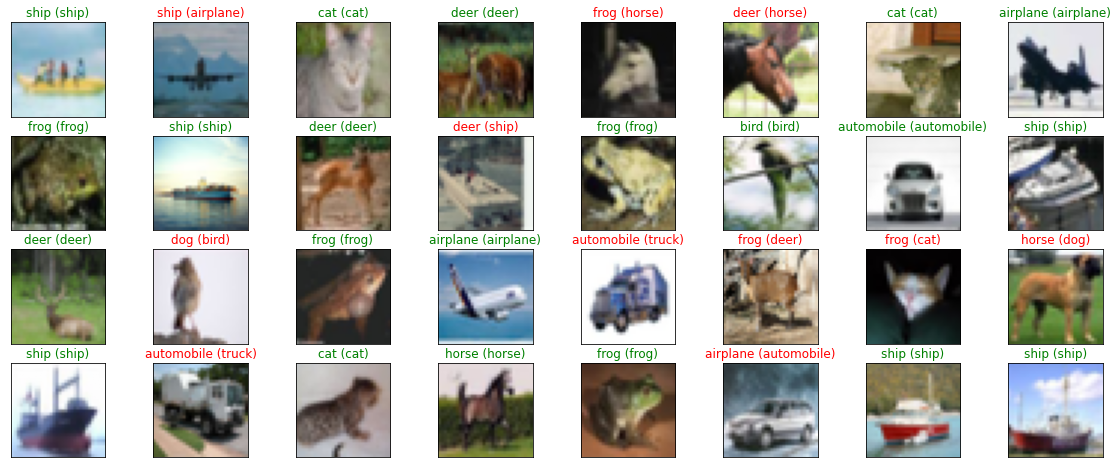

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
